# Multiple Linear Regression in StatsModels - Lab

## Introduction
In this lab, you'll practice fitting a multiple linear regression model on the Ames Housing dataset!

## Objectives

You will be able to:

* Perform a multiple linear regression using StatsModels
* Visualize individual predictors within a multiple linear regression
* Interpret multiple linear regression coefficients from raw, un-transformed data

## The Ames Housing Dataset

The [Ames Housing dataset](http://jse.amstat.org/v19n3/decock.pdf) is a newer (2011) replacement for the classic Boston Housing dataset. Each record represents a residential property sale in Ames, Iowa. It contains many different potential predictors and the target variable is `SalePrice`.

In [1]:
import pandas as pd
ames = pd.read_csv("ames.csv", index_col=0)
ames

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [2]:
ames.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


We will focus specifically on a subset of the overall dataset. These features are:

```
LotArea: Lot size in square feet

1stFlrSF: First Floor square feet

GrLivArea: Above grade (ground) living area square feet
```

In [3]:
ames_subset = ames[['LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']].copy()
ames_subset

,LotArea,1stFlrSF,GrLivArea,SalePrice
Id,,,,
1,8450,856,1710,208500
2,9600,1262,1262,181500
3,11250,920,1786,223500
4,9550,961,1717,140000
5,14260,1145,2198,250000
...,...,...,...,...
1456,7917,953,1647,175000
1457,13175,2073,2073,210000
1458,9042,1188,2340,266500


## Step 1: Visualize Relationships Between Features and Target

For each feature in the subset, create a scatter plot that shows the feature on the x-axis and `SalePrice` on the y-axis.

In [4]:
# Your code here - import relevant library, create scatter plots
import matplotlib.pyplot as plt



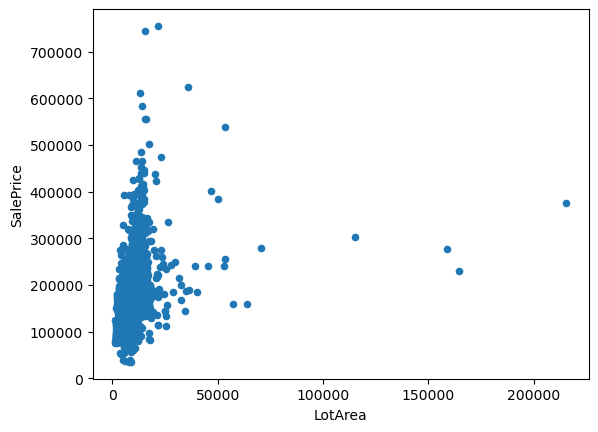

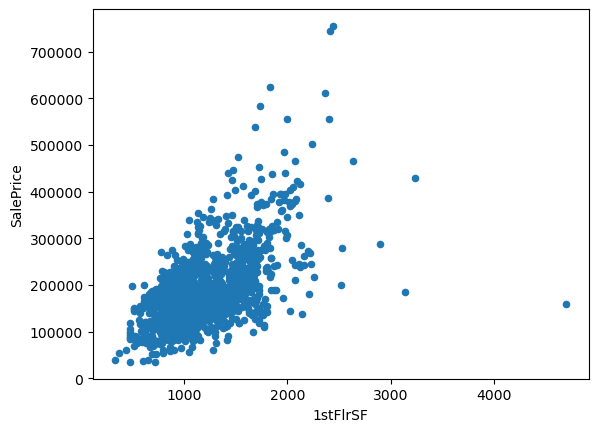

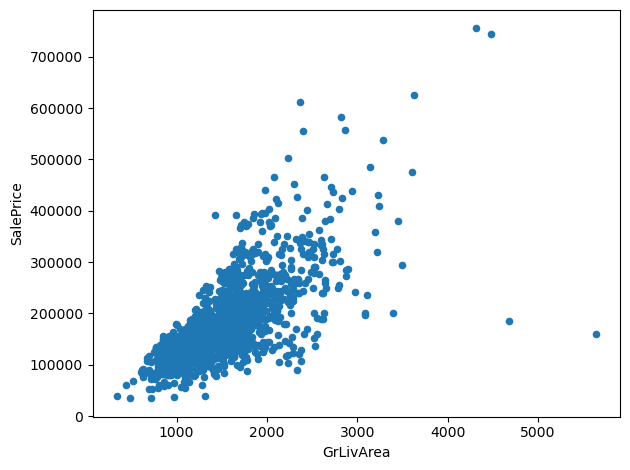

In [5]:
# Your written answer here - do these seem like good candidates for linear regression?
ames_subset.plot.scatter(x="LotArea", y="SalePrice")
ames_subset.plot.scatter(x="1stFlrSF", y="SalePrice")
ames_subset.plot.scatter(x="GrLivArea", y="SalePrice")

plt.tight_layout()
plt.show()


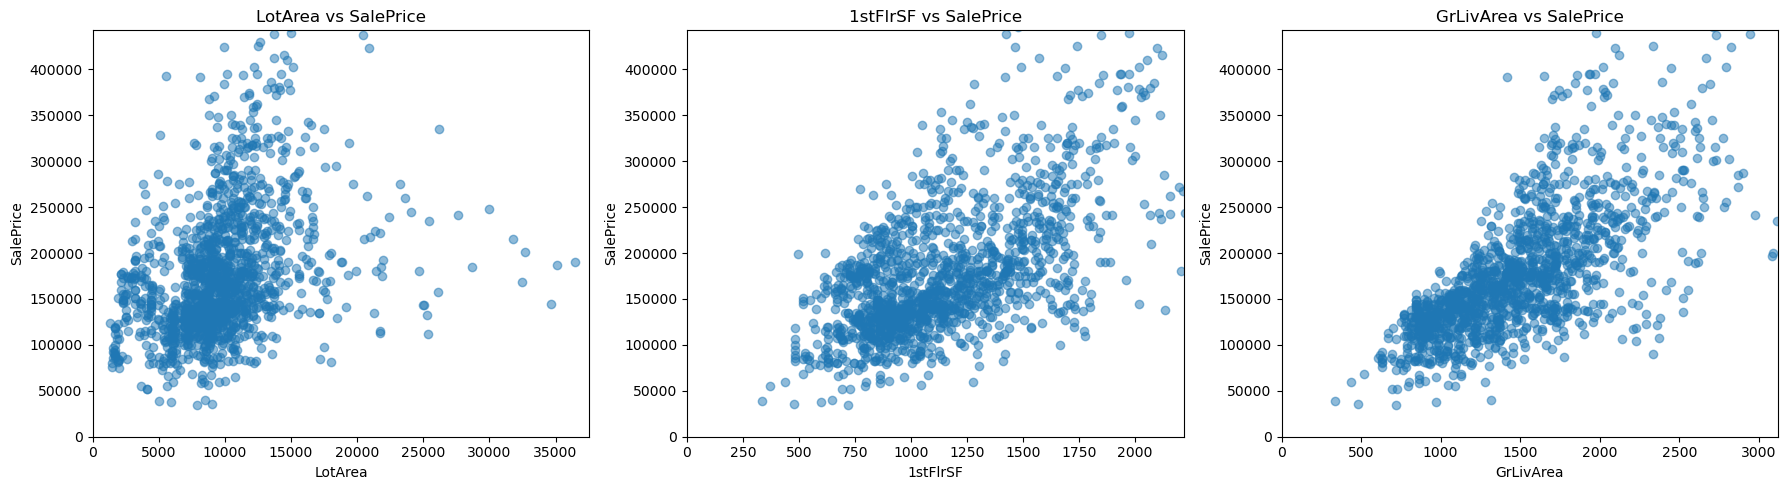

In [6]:


# Features to plot
features = ['LotArea', '1stFlrSF', 'GrLivArea']

# Set up subplots
fig, axes = plt.subplots(1, len(features), figsize=(18, 5))

for i, feature in enumerate(features):
    axes[i].scatter(ames[feature], ames['SalePrice'], alpha=0.5)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('SalePrice')
    axes[i].set_title(f'{feature} vs SalePrice')
    
    # Optional: limit extreme outliers for a cleaner plot
    axes[i].set_xlim(0, ames[feature].quantile(0.99))  # cap x-axis at 99th percentile
    axes[i].set_ylim(0, ames['SalePrice'].quantile(0.99))  # cap y-axis at 99th percentile

plt.tight_layout()
plt.show()


## Step 2: Build a Simple Linear Regression Model

Set the dependent variable (`y`) to be the `SalePrice`, then choose one of the features shown in the subset above to be the baseline independent variable (`X`).

Build a linear regression using StatsModels, describe the overall model performance, and interpret its coefficients.

In [31]:
# Your code here - define y and baseline X
y = ames_subset['SalePrice']
x_baseline = ames_subset['1stFlrSF']



In [32]:
# Your code here - import StatsModels, fit baseline model, display results
import statsmodels.api as sm
baseline_model = sm.OLS(y, sm.add_constant(x_baseline))
baseline_results = baseline_model.fit()

print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.367
Model:                            OLS   Adj. R-squared:                  0.367
Method:                 Least Squares   F-statistic:                     845.5
Date:                Wed, 14 Jan 2026   Prob (F-statistic):          5.39e-147
Time:                        14:17:10   Log-Likelihood:                -18210.
No. Observations:                1460   AIC:                         3.642e+04
Df Residuals:                    1458   BIC:                         3.643e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.617e+04   5245.728      6.896      0.0

In [33]:
# Your written answer here - interpret model results
SalePrice=36,170+124.50*x_baseline


## Step 3: Build a Multiple Linear Regression Model

For this model, use **all of** the features in `ames_subset`.

In [38]:
# Your code here - define X

X = ames_subset.drop(columns='SalePrice')  # all predictors


In [40]:
# Your code here - fit model and display results

# Step 3: Define features (X) and target (y)
X   # all predictors
y = ames_subset['SalePrice']               # target variable

# Add constant for intercept
X = sm.add_constant(X)

# Fit the multiple linear regression model
mlr_model = sm.OLS(y, X).fit()

# Display the results summary
print(mlr_model.summary())


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                     630.3
Date:                Wed, 14 Jan 2026   Prob (F-statistic):          1.57e-262
Time:                        14:31:07   Log-Likelihood:                -17936.
No. Observations:                1460   AIC:                         3.588e+04
Df Residuals:                    1456   BIC:                         3.590e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.431e+04   4776.331     -2.997      0.0

In [12]:
# Your written answer here - interpret model results. Does this model seem better than the previous one?

## Step 4: Create Partial Regression Plots for Features

Using your model from Step 3, visualize each of the features using partial regression plots.

c:\Users\mohamed\AppData\Local\anaconda3\Lib\site-packages\statsmodels\graphics\regressionplots.py:430: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fig = abline_plot(0, fitted_line.params[0], color='k', ax=ax)
c:\Users\mohamed\AppData\Local\anaconda3\Lib\site-packages\statsmodels\graphics\regressionplots.py:430: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fig = abline_plot(0, fitted_line.params[0], color='k', ax=ax)
c:\Users\mohamed\AppData\Local\anaconda3\Lib\site-packages\statsmodels\graphics\regressionplots.py:430: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version,

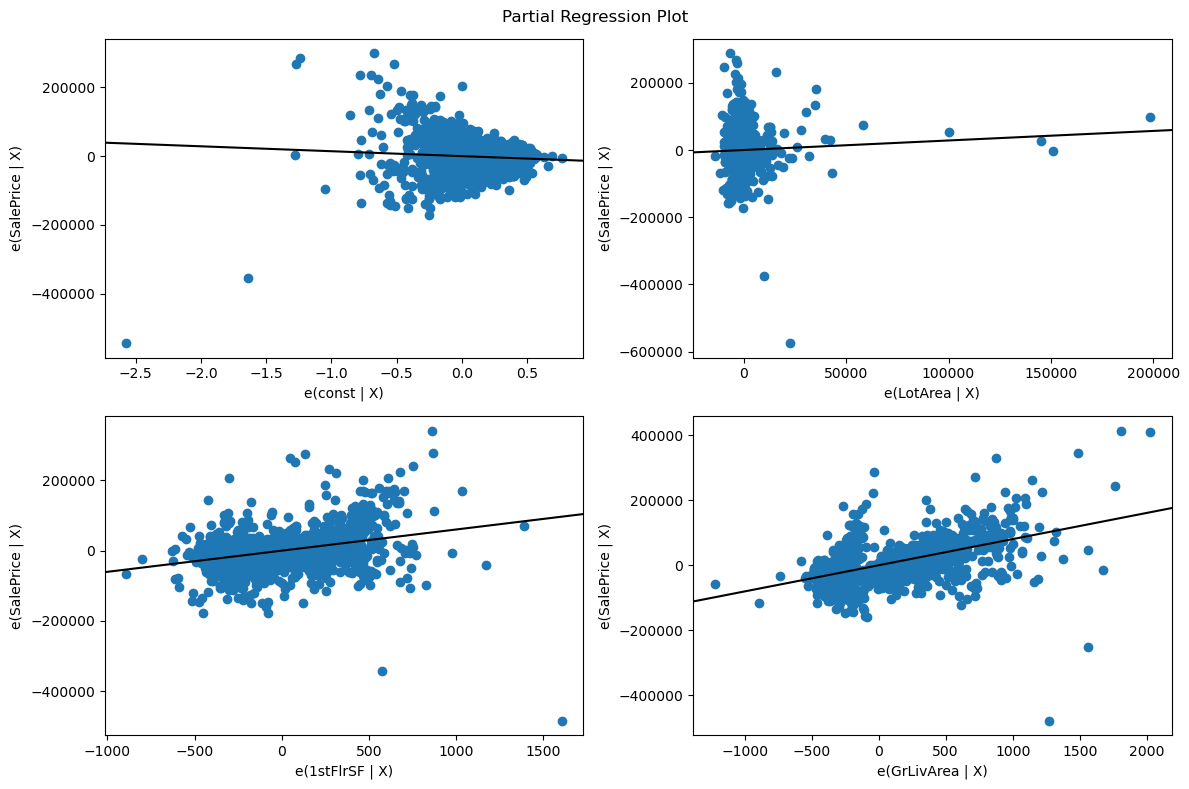

In [41]:
# Your code here - create partial regression plots for each predictor
# Step 4: Partial regression plots
fig = plt.figure(figsize=(12, 8))  # Adjust figure size
sm.graphics.plot_partregress_grid(mlr_model, fig=fig)
plt.tight_layout()
plt.show()

In [ ]:
# Your written answer here - explain what you see, and how this relates
# to what you saw in Step 1. What do you notice?
"""1. Understanding Partial Regression Plots
Each plot shows the relationship between the dependent variable (SalePrice) and one predictor after removing the effects of all other predictors.

Slope of the line = coefficient of that predictor in the multiple regression.

Points far from the line are potential outliers or influential observations.

2. Observations from your plots

LotArea (top-right plot)

The slope is very shallow → confirms that LotArea has a small effect on SalePrice.

Points are widely spread → high variability, which explains why its p-value was marginal (≈0.051).

1stFlrSF (bottom-left plot)

Clear positive slope → significant predictor of SalePrice.

Spread of points is moderate → mostly linear relationship, consistent with its significant coefficient (~Ksh 60 per sq. ft).

GrLivArea (bottom-right plot)

Strong positive slope and tighter linear trend → confirms this is the strongest predictor, consistent with the highest coefficient (~Ksh 80 per sq. ft).

Some outliers exist with very high living areas → may influence the regression.

Intercept (top-left plot)

Mostly shows residuals around zero; the line’s slope is flat because it represents the baseline after controlling for predictors.

3. Relation to Step 1 (Simple Linear Regression)

In Step 1, 1stFlrSF alone explained only ~37% of variation (R² = 0.367).

Now, the partial plots show that GrLivArea adds additional explanatory power beyond 1stFlrSF.

LotArea contributes very little, which matches the small slope and marginal significance.

4. Key Takeaways

GrLivArea is the dominant driver of SalePrice.

1stFlrSF is still important but partially redundant with GrLivArea → multicollinearity is possible.

LotArea has minimal independent effect after controlling for the other variables.

Outliers exist in living area and lot size → they could influence predictions.

Overall, the partial regression plots confirm what the regression coefficients told us: GrLivArea is most important, 1stFlrSF is moderately important, and LotArea is weak."""

## Level Up (Optional)

Re-create this model in scikit-learn, and check if you get the same R-Squared and coefficients.

In [48]:
# Your code here - import linear regression from scikit-learn and create and fit model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
X_skl = pd.get_dummies(X.drop(columns='const'), drop_first=True)

In [50]:
# Your code here - compare R-Squared
# Initialize Linear Regression model
lr = LinearRegression()

# Fit the model
lr.fit(X_skl, y)

# Predict using the fitted model
y_pred = lr.predict(X_skl)

# Compare R-squared
r2_sklearn = r2_score(y, y_pred)
print(f"R-squared (sklearn) = {r2_sklearn:.3f}")

# Compare intercept and coefficients
print(f"Intercept (sklearn) = {lr.intercept_:.3f}")
coeff_df = pd.DataFrame({'Feature': X_skl.columns, 'Coefficient_sklearn': lr.coef_})
print(coeff_df)

R-squared (sklearn) = 0.565
Intercept (sklearn) = -14313.409
     Feature  Coefficient_sklearn
0    LotArea             0.284134
1   1stFlrSF            60.286646
2  GrLivArea            80.606058


In [51]:
# Your code here - compare intercept and coefficients
# Compare intercept and coefficients
print(f"Intercept (sklearn) = {lr.intercept_:.3f}")
coeff_df = pd.DataFrame({'Feature': X_skl.columns, 'Coefficient_sklearn': lr.coef_})
print(coeff_df)

Intercept (sklearn) = -14313.409
     Feature  Coefficient_sklearn
0    LotArea             0.284134
1   1stFlrSF            60.286646
2  GrLivArea            80.606058


## Summary
Congratulations! You fitted your first multiple linear regression model on the Ames Housing data using StatsModels.